# Finance V: Research Topics in Finance, Risk- and Resource management 
## Replication of paper: ...

<blockquote>
    Author: Stefan Reimer <br>
    Date: 2019-12-28 <br>
    python version: 3.7 <br>
</blockquote>

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
import collections

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

# import defined functions
from src.functions.functions import data_import_chunkwise, replace_hardcoded_columnames

# set the settings for displayed dataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 1 Load Data

In [2]:
#%%
# define path to files & load data chunkwise
filePath = "data/initial_data/000_sdc_full.csv"

sdc_data = data_import_chunkwise(filePath=filePath)

INFO:root:loading started...
INFO:root:loading finished.


The loaded data frame has 43709 rows and 86 columns.


# first data exploration

In [3]:
# show first 5 rows
sdc_data.head(5)

,DealNumber,CIK,CUSIP6,CUSIP9,Issuer,FilingDate,IssueDate,IPO,OrigIPO,Type,REIT,ADR,Unit,CEF,MainSICCode,Units,SpinOff,ForeignIssue,TrackingStockIssue,BestEftFirmCmtBghtDl,OfferPrice,SharesOutstandingAfterTheOffering,SharesOutstandingBeforeOffering,SharesOfferedSumOfAllMkts,SharesOfrdIncOverSoldSumOfAllMkts,PrimaryShsOfrdSumOfAllMkts,SecondaryShsOfrdSumOfAllMkts,OverallotAmtOptionSumOfAllMktsMil,OverallotAmtSoldSumOfAllMktsmil,TotGlobalOverallotmentSharesSold,SharesFiledSumOfAllMkts,PrimaryShsFiledSumOfAllMkts,SecondaryShsFiledSumOfAllMkts,AmendedShsFiledSumOfAllMkts,AmendedPrimaryShsFiledSumOfAllMkts,AmendedSecondaryShsFiledSumOfAllMkts,AmendMentDate,AmendHistShsFiledSumOfAllMkts,AmendHistSecShsFiledSumOfAllMkts,AmendHistOverallotShsOptionSumOfAllMkts,TickerAtIssue,TickerUltimateParents,TickerCurrent,TickerSpinOffParent,AllManagers_x,NonBookrunners,AllManagersParentsCode,AllMgrRoleCode,Managers_x,CoManagers,LeadManager,ManagerAgentsLawyersCode,DomesticSyndicateMemberCode,Bookrunners_x,BookrunnersParent,VentureBacked,FirmName,FundName,RoundNumberOfInvesTors,DisclosedRoundTotalmil,RoundDate,TotalKnownAmtInvestedInCompany000,AllManagers_y,Bookrunners_y,LeadManagersLongName,LeadManagers,Managers_y,CoManagersLongName,State,Nation,CurrentExchangeLongDescriptio,AllExchangesWhereIssueWillBeListed_1,AllExchangesWhereIssueWillBeListed_2,ExchangeWhereIssuWillBeLi,AllExchangesWhereIssuersStockTrades,FirstTwoExchangesWhereIssueWillBeListed,SpinParExch,PrimaryExchangeWhereIssuersStockTrades,AmendedHighFilingPrice,AmendedLowFilingPrice,AmendedMiddleOfFilingPrice,HighPriceOfFilingPriceRnge,LowPriceOfFilingPriceRnge,OriginalHighFilingPrice,OriginalLowFilingPrice,OriginalMiddleOfFilingPriceRange
0,62319002,NaN,655312,NaN,Nolex Corp,NaN,1973-01-02,Yes,NaN,Common Shares,NaN,No,No,No,5111,No,N,No,No,NaN,7.00,500000.0,NaN,500000.0,500000.0,500000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NLX,NLX,NaN,NaN,SHAPIRO,NaN,SHAPIRO,BM,SHAPIRO,NaN,SHAPIRO,NaN,NaN,SHAPIRO,SHAPIRO,No,NaN,NaN,NaN,NaN,NaN,NaN,J. Shapiro,J. Shapiro Co.,J. Shapiro Co.,SHAPIRO,J. Shapiro Co.,NaN,California,United States,New York,A,A,AMEX,American,AMEX,NaN,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62321002,NaN,560787,NaN,Major Electronics,NaN,1973-01-04,No,NaN,Common Shares,NaN,No,No,No,3669,No,N,No,No,NaN,16.75,150000.0,NaN,225000.0,225000.0,150000.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEIDEN,NaN,SEIDEN,BM,SEIDEN,NaN,SEIDEN,NaN,NaN,SEIDEN,SEIDEN,No,NaN,NaN,NaN,NaN,NaN,NaN,Seiden & de Cuevas,Seiden & de Cuevas,Seiden & de Cuevas,SEIDEN,Seiden & de Cuevas,NaN,Unknown,United States,NaN,NM,NM,NASDQ,Nasdaq,NASDQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62322002,NaN,001032,NaN,AES Technology Systems,NaN,1973-01-05,Yes,NaN,Common Shares,NaN,No,No,No,3579,No,N,No,No,NaN,10.50,150000.0,NaN,260000.0,260000.0,150000.0,110000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AEST,AEST,NaN,NaN,RICHARD-ELLIS//PASCUMA,PASCUMA,CB-RICHARD-ELL,BM,RICHARD-ELLIS,PASCUMA,RICHARD-ELLIS,NaN,NaN,RICHARD-ELLIS,CB-RICHARD-ELL,No,NaN,NaN,NaN,NaN,NaN,NaN,"Pascuma, Florsheim",CB Richard Ellis & Co,CB Richard Ellis & Co,RICHARD-ELLIS,"Pascuma, Florsheim & Co.","Pascuma, Florsheim & Co.",Illinois,United States,NaN,O,O,OTC,OTC,OTC,NaN,OTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62324002,NaN,893287,NaN,Trans-National Leasing Inc,NaN,1973-01-05,Yes,NaN,Common Shares,NaN,No,No,No,7515,No,N,No,No,NaN,5.50,200000.0,NaN,200000.0,200000.0,200000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TNLS,TNLS,NaN,NaN,BROWN-ALLEN,NaN,BROWN-ALLEN,BM,BROWN-ALLEN,NaN,BROWN-ALLEN,NaN,NaN,BROWN-ALLEN,BROWN-ALLEN,No,NaN,NaN,NaN,NaN,NaN,NaN,"Brown, Allen & Co.","Brown, Allen & Co.","Brown, Allen & Co.",BROWN-ALLEN,"Brown, Allen & Co.",NaN,Texas,United States,New York,O,O,OTC,OTC,OTC,NaN,OTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62326002,NaN,221754,NaN,Cotton Petroleum,NaN,1973-01-09,No,NaN,Common Shares,NaN,No,No,No,1311,Yes,N,No,No,NaN,14.00,500000.0,NaN,500000.0,500000.0

In [4]:
# show last 5 rows
sdc_data.tail(5)

,DealNumber,CIK,CUSIP6,CUSIP9,Issuer,FilingDate,IssueDate,IPO,OrigIPO,Type,REIT,ADR,Unit,CEF,MainSICCode,Units,SpinOff,ForeignIssue,TrackingStockIssue,BestEftFirmCmtBghtDl,OfferPrice,SharesOutstandingAfterTheOffering,SharesOutstandingBeforeOffering,SharesOfferedSumOfAllMkts,SharesOfrdIncOverSoldSumOfAllMkts,PrimaryShsOfrdSumOfAllMkts,SecondaryShsOfrdSumOfAllMkts,OverallotAmtOptionSumOfAllMktsMil,OverallotAmtSoldSumOfAllMktsmil,TotGlobalOverallotmentSharesSold,SharesFiledSumOfAllMkts,PrimaryShsFiledSumOfAllMkts,SecondaryShsFiledSumOfAllMkts,AmendedShsFiledSumOfAllMkts,AmendedPrimaryShsFiledSumOfAllMkts,AmendedSecondaryShsFiledSumOfAllMkts,AmendMentDate,AmendHistShsFiledSumOfAllMkts,AmendHistSecShsFiledSumOfAllMkts,AmendHistOverallotShsOptionSumOfAllMkts,TickerAtIssue,TickerUltimateParents,TickerCurrent,TickerSpinOffParent,AllManagers_x,NonBookrunners,AllManagersParentsCode,AllMgrRoleCode,Managers_x,CoManagers,LeadManager,ManagerAgentsLawyersCode,DomesticSyndicateMemberCode,Bookrunners_x,BookrunnersParent,VentureBacked,FirmName,FundName,RoundNumberOfInvesTors,DisclosedRoundTotalmil,RoundDate,TotalKnownAmtInvestedInCompany000,AllManagers_y,Bookrunners_y,LeadManagersLongName,LeadManagers,Managers_y,CoManagersLongName,State,Nation,CurrentExchangeLongDescriptio,AllExchangesWhereIssueWillBeListed_1,AllExchangesWhereIssueWillBeListed_2,ExchangeWhereIssuWillBeLi,AllExchangesWhereIssuersStockTrades,FirstTwoExchangesWhereIssueWillBeListed,SpinParExch,PrimaryExchangeWhereIssuersStockTrades,AmendedHighFilingPrice,AmendedLowFilingPrice,AmendedMiddleOfFilingPrice,HighPriceOfFilingPriceRnge,LowPriceOfFilingPriceRnge,OriginalHighFilingPrice,OriginalLowFilingPrice,OriginalMiddleOfFilingPriceRange
43704,3488205002,1412408.0,71944F,71944F106,Phreesia Inc,2019-12-10,2019-12-12,No,NaN,Common Shares,NaN,No,No,No,7372,No,N,No,No,NaN,26.00,35872057.0,3.0,6750000.0,6750000.0,0.0,6750000.0,26.325,NaN,NaN,"6,000,000",NaN,"6,000,000","6,750,000",NaN,"6,750,000",12/12/19,"6,750,000","6,750,000","1,012,500",PHR,PHR,PHR,NaN,JPM-SEC-LLC(JB)/WELLS-FARGO-SEC(JB),BAIRD/RAYMOND,JPM,JB,JPM-SEC-LLC,BAIRD/RAYMOND,JPM-SEC-LLC/WELLS-FARGO-SEC/WM-BLAIR,NaN,NaN,JPM-SEC-LLC,JPM,No,NaN,NaN,NaN,NaN,NaN,NaN,Wells Fargo Securities LLC|William Blair & Co|...,Wells Fargo Securities LLC|William Blair & Co|...,Wells Fargo Securities LLC|William Blair & Co|...,WELLS-FARGO-SEC|WM-BLAIR|ALLEN|PIPER-JAFFRAY,Wells Fargo Securities LLC|William Blair & Co|...,Raymond James & Associates Inc,New York,United States,New York,N,N,NYSE,New York,NYSE,NaN,New York,28.67,28.67,28.67,28.67,28.67,28.93,28.93,28.93
43705,3481495002,1789760.0,8J3835,NaN,Ciig Merger Corp,2019-11-22,2019-12-12,Yes,NaN,Units,NaN,No,Yes,Yes,6726,No,Y,No,No,NaN,10.00,28968750.0,NaN,22500000.0,22500000.0,22500000.0,0.0,33.750,NaN,NaN,"22,500,000","22,500,000",NaN,"22,500,000","22,500,000",NaN,12/12/19,"22,500,000",NaN,"3,375,000",CIICU,NaN,NaN,NaN,UBS-SEC(JB)/BARCLAYS-CAP-I(JB),NaN,UBS-BANK,JB,UBS-SEC,NaN,UBS-SEC/BARCLAYS-CAP-I,NaN,NaN,UBS-SEC,UBS-BANK,No,NaN,NaN,NaN,NaN,NaN,NaN,Barclays Capital Inc,Barclays Capital Inc,Barclays Capital Inc,BARCLAYS-CAP-I,Barclays Capital Inc,NaN,New York,United States,NaN,NM,NM,NASDQ,Nasdaq,NASDQ,NaN,Nasdaq,10,10,10,10.0,10.0,10.00,10.00,10.00
43706,3481532002,1791091.0,8J3864,NaN,Healthcare Merger Corp,2019-11-25,2019-12-12,Yes,NaN,Units,NaN,No,No,Yes,6726,No,Y,No,No,NaN,10.00,0.0,NaN,22000000.0,22000000.0,22000000.0,0.0,33.000,NaN,NaN,"20,000,000","20,000,000",NaN,"22,000,000","22,000,000",NaN,12/12/19,"22,000,000",NaN,"3,300,000",HCCOU,NaN,NaN,NaN,CAN-FITZ-CO,NaN,CAN-FITZ,BM,CAN-FITZ-CO,NaN,CAN-FITZ-CO,NaN,NaN,CAN-FITZ-CO,CAN-FITZ,No,NaN,NaN,NaN,NaN,NaN,NaN,Cantor Fitzgerald & Co,Cantor Fitzgerald & Co,Cantor Fitzgerald & Co,CAN-FITZ-CO,Cantor Fitzgerald & Co,NaN,New York,United States,NaN,NM,NM,NASDQ,Nasdaq,NASDQ,NaN,Nasdaq,10,10,10,10.0,10.0,10.00,10.00,10.00
43707,3489650002,NaN,913915,913915104,Universal Technical Institute,2019-12-12,2019-12-12,No,NaN,Common Shares,NaN,No,No,No,

In [5]:
# get key statistics for data
sdc_data.describe()

,DealNumber,CIK,OfferPrice,SharesOutstandingAfterTheOffering,SharesOutstandingBeforeOffering,SharesOfferedSumOfAllMkts,SharesOfrdIncOverSoldSumOfAllMkts,PrimaryShsOfrdSumOfAllMkts,SecondaryShsOfrdSumOfAllMkts,OverallotAmtSoldSumOfAllMktsmil
count,4.370900e+04,2.475100e+04,4.370500e+04,4.370900e+04,22749.000000,4.370000e+04,4.370200e+04,4.370900e+04,4.370900e+04,21025.000000
mean,1.289522e+09,1.009768e+06,2.148717e+02,1.195543e+08,22.512726,1.076347e+07,1.136741e+07,8.217867e+06,2.430589e+06,22.861588
std,1.062256e+09,4.475233e+05,2.537234e+04,2.109662e+09,350.294326,1.089498e+08,1.110285e+08,1.001540e+08,4.250890e+07,70.603186
min,4.510020e+05,1.750000e+03,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-3.000000e+06,0.000000e+00,0.001000
25%,3.083810e+08,8.329040e+05,7.750000e+00,4.125000e+06,2.000000,1.560873e+06,1.698960e+06,8.600000e+05,0.000000e+00,2.912000
50%,1.095128e+09,1.038572e+06,1.462500e+01,1.737549e+07,3.000000,3.500000e+06,3.751748e+06,2.500000e+06,0.000000e+00,8.625000
75%,2.278038e+09,1.364479e+06,2.350000e+01,5.016718e+07,8.000000,7.700000e+06,8.100000e+06,6.000000e+06,2.000000e+05,21.420000
max,3.490135e+09,1.791091e+06,5.250000e+06,2.862025e+11,29080.000000,9.953283e+09,9.953283e+09,9.953283e+09,4.891005e+09,3265.081000


In [6]:
# show all columns names
sdc_data.columns

Index(['DealNumber', 'CIK', 'CUSIP6', 'CUSIP9', 'Issuer', 'FilingDate',
       'IssueDate', 'IPO', 'OrigIPO', 'Type', 'REIT', 'ADR', 'Unit', 'CEF',
       'MainSICCode', 'Units', 'SpinOff', 'ForeignIssue', 'TrackingStockIssue',
       'BestEftFirmCmtBghtDl', 'OfferPrice',
       'SharesOutstandingAfterTheOffering', 'SharesOutstandingBeforeOffering',
       'SharesOfferedSumOfAllMkts', 'SharesOfrdIncOverSoldSumOfAllMkts',
       'PrimaryShsOfrdSumOfAllMkts', 'SecondaryShsOfrdSumOfAllMkts',
       'OverallotAmtOptionSumOfAllMktsMil', 'OverallotAmtSoldSumOfAllMktsmil',
       'TotGlobalOverallotmentSharesSold', 'SharesFiledSumOfAllMkts',
       'PrimaryShsFiledSumOfAllMkts', 'SecondaryShsFiledSumOfAllMkts',
       'AmendedShsFiledSumOfAllMkts', 'AmendedPrimaryShsFiledSumOfAllMkts',
       'AmendedSecondaryShsFiledSumOfAllMkts', 'AmendMentDate',
       'AmendHistShsFiledSumOfAllMkts', 'AmendHistSecShsFiledSumOfAllMkts',
       'AmendHistOverallotShsOptionSumOfAllMkts', 'TickerAtIssue',
   

In [7]:
# Question: how many values are often missing?
na_freq = sdc_data.isna().sum()
na_freq = na_freq/sdc_data.shape[0]
print(na_freq[na_freq>0.85])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


REIT                                    0.933286
BestEftFirmCmtBghtDl                    0.995218
SecondaryShsFiledSumOfAllMkts           0.889611
AmendedSecondaryShsFiledSumOfAllMkts    0.906999
TickerSpinOffParent                     0.973209
ManagerAgentsLawyersCode                0.997987
DomesticSyndicateMemberCode             0.905878
FirmName                                0.898053
FundName                                0.898053
RoundNumberOfInvesTors                  0.898053
DisclosedRoundTotalmil                  0.904299
RoundDate                               0.898053
TotalKnownAmtInvestedInCompany000       0.905786
SpinParExch                             0.973118
dtype: float64


A lot of missing values in the data.

In [8]:
IPO_Counter = collections.Counter(sdc_data['IPO'])
print(IPO_Counter)
IPO_yes_percentage = IPO_Counter['Yes']/(IPO_Counter['Yes']+IPO_Counter['No'])
print(f"{IPO_yes_percentage} percent of the data points finished the IPO.")

Counter({'No': 28400, 'Yes': 15309})
0.3502482326294356 percent of the data points finished the IPO.


In [9]:
# Question: Are many missing values in the companies, that finished the IPO?
na_freq_of_finished_ipos = sdc_data.loc[sdc_data['IPO']=='Yes'].isna().sum()
na_freq_of_finished_ipos = na_freq_of_finished_ipos/sdc_data.loc[sdc_data['IPO']=='Yes'].shape[0]
print(na_freq_of_finished_ipos)

DealNumber                                 0.000000
CIK                                        0.568881
CUSIP6                                     0.000000
CUSIP9                                     0.210464
Issuer                                     0.000000
FilingDate                                 0.071200
IssueDate                                  0.000000
IPO                                        0.000000
OrigIPO                                    0.896140
Type                                       0.000000
REIT                                       0.970475
ADR                                        0.001894
Unit                                       0.104318
CEF                                        0.000261
MainSICCode                                0.000000
Units                                      0.000261
SpinOff                                    0.000000
ForeignIssue                               0.000000
TrackingStockIssue                         0.003985
BestEftFirmC

## Duplicate analysis

In [10]:
def get_duplicates(df, column, comment=''):
    # function to print the sum of duplicates and return the duplicates
    duplicates = df.loc[:, [column]].duplicated()
    duplicates_sum = duplicates.sum()
    print(f'There are {duplicates_sum} duplicates in {column}{comment}.')
    return duplicates

In [11]:
# get the duplicates for choosen columns
duplicated_issuers = get_duplicates(sdc_data, 'Issuer')
duplicated_IPO_issuers = get_duplicates(sdc_data.loc[sdc_data['IPO']=='Yes', :], 'Issuer', ' (only fulfilled IPOs)')
duplicated_CUSIP6 = get_duplicates(sdc_data, 'CUSIP6')
duplicated_indices = sdc_data.index.duplicated().sum()
print(f'There are {duplicated_indices} duplicated indices.')

There are 22804 duplicates in Issuer.
There are 1430 duplicates in Issuer (only fulfilled IPOs).
There are 23050 duplicates in CUSIP6.
There are 0 duplicated indices.


In [12]:
# show number of duplicates for all columns
#for column in sdc_data.columns.values:
#    duplicated_issuers = get_duplicates(sdc_data, column)

In [13]:
# get and inspect the duplicated rows
duplicated_issuers_true = duplicated_issuers[duplicated_issuers == 1]
duplicated_issuers_values = sdc_data.loc[sdc_data.index.isin(duplicated_issuers_true.index), :][['Issuer', 'CUSIP9', 'IPO']]
duplicated_issuers_values = duplicated_issuers_values.sort_values('CUSIP9')
print(duplicated_issuers_values.head(70))

                             Issuer     CUSIP9  IPO
6564                       AAR Corp  000361105   No
18529                      AAR Corp  000361105   No
15564        ABC Rail Products Corp  000752105   No
15563        ABC Rail Products Corp  000752105   No
14811        ABC Rail Products Corp  000752105   No
7332                  ABM Gold Corp  000776104  Yes
16810  ABR Information Services Inc  00077R108   No
13867    ABT Building Products Corp  000782102   No
17835                      ACC Corp  000794107   No
17043                      ACC Corp  000794107   No
24962   A C Moore Arts & Crafts Inc  00086T103   No
13865           ACS Enterprises Inc  000872309   No
11750           ACS Enterprises Inc  000872309   No
22873                      ACTV Inc  00088E104   No
22872                      ACTV Inc  00088E104   No
12983                    ADESA Corp  000892109   No
39955            ADMA Biologics Inc  000899104   No
41606            ADMA Biologics Inc  000899104   No
43131       

In [14]:
# inspect choosen duplicates
#sdc_data.loc[sdc_data['Issuer'] == 'AMAX Inc', :]
sdc_data.loc[sdc_data['Issuer'] == 'ADMA Biologics Inc', :]

,DealNumber,CIK,CUSIP6,CUSIP9,Issuer,FilingDate,IssueDate,IPO,OrigIPO,Type,REIT,ADR,Unit,CEF,MainSICCode,Units,SpinOff,ForeignIssue,TrackingStockIssue,BestEftFirmCmtBghtDl,OfferPrice,SharesOutstandingAfterTheOffering,SharesOutstandingBeforeOffering,SharesOfferedSumOfAllMkts,SharesOfrdIncOverSoldSumOfAllMkts,PrimaryShsOfrdSumOfAllMkts,SecondaryShsOfrdSumOfAllMkts,OverallotAmtOptionSumOfAllMktsMil,OverallotAmtSoldSumOfAllMktsmil,TotGlobalOverallotmentSharesSold,SharesFiledSumOfAllMkts,PrimaryShsFiledSumOfAllMkts,SecondaryShsFiledSumOfAllMkts,AmendedShsFiledSumOfAllMkts,AmendedPrimaryShsFiledSumOfAllMkts,AmendedSecondaryShsFiledSumOfAllMkts,AmendMentDate,AmendHistShsFiledSumOfAllMkts,AmendHistSecShsFiledSumOfAllMkts,AmendHistOverallotShsOptionSumOfAllMkts,TickerAtIssue,TickerUltimateParents,TickerCurrent,TickerSpinOffParent,AllManagers_x,NonBookrunners,AllManagersParentsCode,AllMgrRoleCode,Managers_x,CoManagers,LeadManager,ManagerAgentsLawyersCode,DomesticSyndicateMemberCode,Bookrunners_x,BookrunnersParent,VentureBacked,FirmName,FundName,RoundNumberOfInvesTors,DisclosedRoundTotalmil,RoundDate,TotalKnownAmtInvestedInCompany000,AllManagers_y,Bookrunners_y,LeadManagersLongName,LeadManagers,Managers_y,CoManagersLongName,State,Nation,CurrentExchangeLongDescriptio,AllExchangesWhereIssueWillBeListed_1,AllExchangesWhereIssueWillBeListed_2,ExchangeWhereIssuWillBeLi,AllExchangesWhereIssuersStockTrades,FirstTwoExchangesWhereIssueWillBeListed,SpinParExch,PrimaryExchangeWhereIssuersStockTrades,AmendedHighFilingPrice,AmendedLowFilingPrice,AmendedMiddleOfFilingPrice,HighPriceOfFilingPriceRnge,LowPriceOfFilingPriceRnge,OriginalHighFilingPrice,OriginalLowFilingPrice,OriginalMiddleOfFilingPriceRange
36853,2412570002,NaN,000899,000899104,ADMA Biologics Inc,2012-03-29,2013-10-16,Yes,NaN,Common Shares,NaN,No,No,No,2836,No,Y,No,No,NaN,8.50,9726884.0,NaN,3352941.0,3855882.0,3352941.0,0.0,4.275,4.275,"502,941","1,881,161",NaN,"1,881,161","2,666,667","2,666,667",NaN,05/06/12|03/07/12|10/08/12|13/08/12|11/02/13|0...,"1,881,161|1,969,026|1,969,026|1,969,026|-|2,10...","1,881,161|1,969,026|1,969,026|1,969,026|-|-|-|...","-|-|-|-|-|315,000|315,000|458,823|400,000|400,000",NaN,NaN,ADMA,NaN,OPPENHEIMER-CO//LADENBURG/MAXIM-GROUP,LADENBURG/MAXIM-GROUP/LAIDLAW-UK,OPPEN-HOLD,BM,OPPENHEIMER-CO,LADENBURG/MAXIM-GROUP/LAIDLAW-UK,OPPENHEIMER-CO,NaN,NaN,OPPENHEIMER-CO,OPPEN-HOLD,Yes,Undisclosed Firm|Undisclosed Firm|Aisling Capi...,Undisclosed Fund|Undisclosed Fund|Aisling Capi...,5|5|5|5|1|1|5,"17,550.0|17,550.0|17,550.0|17,550.0|-|3,500.0|...",13/02/2012|13/02/2012|13/02/2012|13/02/2012|21...,"27,050.0",Ladenburg Thalmann & Co|Maxim Group LLC|Laidla...,Oppenheimer & Co Inc,Oppenheimer & Co Inc,OPPENHEIMER-CO,Ladenburg Thalmann & Co|Maxim Group LLC|Laidla...,Maxim Group LLC|Laidlaw & Co (UK) Ltd,New Jersey,United States,Nasdaq,O,O,OTC,OTC,OTC,NaN,OTC,9.5,8.5,9,9.6|11.5|11.5|11.5|15.5|15.5|9.0|9.5|9.5,9.6|9.6|9.6|9.6|13.5|13.5|8.0|8.5|8.5,9.60,9.60,9.60
38924,2732514002,1368514.0,000899,000899104,ADMA Biologics Inc,2014-11-28,2015-03-13,No,NaN,Common Shares,NaN,No,No,No,2836,No,N,No,No,NaN,8.00,10700573.0,NaN,1225000.0,1408750.0,1225000.0,0.0,1.470,1.470,"183,750",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADMA,ADMA,ADMA,NaN,RAYMOND//LAIDLAW-UK/MAXIM-GROUP,LAIDLAW-UK/MAXIM-GROUP,RAYJAM,BM,RAYMOND,LAIDLAW-UK/MAXIM-GROUP,RAYMOND,NaN,NaN,RAYMOND,RAYJAM,No,NaN,NaN,NaN,NaN,NaN,NaN,Laidlaw & Co (UK) Ltd|Maxim Group LLC,Raymond James & Associates Inc,Raymond James & Associates Inc,RAYMOND,Laidlaw & Co (UK) Ltd|Maxim Group LLC,Maxim Group LLC,New Jersey,United States,Nasdaq,NM,NM,NASDQ,Nasdaq,NASDQ,NaN,OTC,NaN,NaN,NaN,NaN,NaN,8.60,8.60,8.60
39955,2953009002,1368514.0,000899,000899104,ADMA Biologics Inc,2016-04-27,2016-04-28,No,NaN,Common Shares,NaN,No,No,No,2836,No,N,No,No,NaN,6.50,12886741.0,1.0,1892308.0,2176154.0,1892308.0,0.0,1.845,1.845,"283,846",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADMA,ADMA,ADMA,NaN,RAYMOND,NaN,RAYJAM,BM,RAYMOND,NaN,RAYMOND,NaN,NaN,RAYMOND,RAYJAM,No,NaN,

# 2 Data preparation

- Sort dataFrame
- inspect groups of columns
- convert date types

- create additional variables

In [15]:
# sort dataFrame
sdc_data = sdc_data.sort_index()

In [16]:
sdc_data.dtypes

DealNumber                                   int64
CIK                                        float64
CUSIP6                                      object
CUSIP9                                      object
Issuer                                      object
FilingDate                                  object
IssueDate                                   object
IPO                                         object
OrigIPO                                     object
Type                                        object
REIT                                        object
ADR                                         object
Unit                                        object
CEF                                         object
MainSICCode                                 object
Units                                       object
SpinOff                                     object
ForeignIssue                                object
TrackingStockIssue                          object
BestEftFirmCmtBghtDl           

In [17]:
def find_char_in_colnames(df, char_to_find):
    """ function to find colnames in a dataFrame with matching subcharacters
    @param df: dataFrame to search the columns
    @ param char_to_find: character, which should be searched for as substring in the dataframe
    @return: array with matching columns
    """
    col_names = df.columns.values
    matching_col_names = col_names[[char_to_find in i for i in col_names]]
    print(
        f"columns containing <<{char_to_find}>> are:"
        "\n"
        f"{matching_col_names}"
        "\n")
    #print(matching_col_names)
    #print('\t')
    return matching_col_names

In [18]:
# find all columns which contains some date information
date_cols = find_char_in_colnames(sdc_data, 'Date')

# find all columns which contains some price information
price_cols = find_char_in_colnames(sdc_data, 'Price')

# find all columns which contains some share information
share_cols = find_char_in_colnames(sdc_data, 'Share')

# find all columns which contains some overallotment information
overall_cols = find_char_in_colnames(sdc_data, 'Overall')

# find all columns which contains some round information
round_cols = find_char_in_colnames(sdc_data, 'Round')

columns containing <<Date>> are:
['FilingDate' 'IssueDate' 'AmendMentDate' 'RoundDate']

columns containing <<Price>> are:
['OfferPrice' 'AmendedHighFilingPrice' 'AmendedLowFilingPrice'
 'AmendedMiddleOfFilingPrice' 'HighPriceOfFilingPriceRnge'
 'LowPriceOfFilingPriceRnge' 'OriginalHighFilingPrice'
 'OriginalLowFilingPrice' 'OriginalMiddleOfFilingPriceRange']

columns containing <<Share>> are:
['SharesOutstandingAfterTheOffering' 'SharesOutstandingBeforeOffering'
 'SharesOfferedSumOfAllMkts' 'SharesOfrdIncOverSoldSumOfAllMkts'
 'TotGlobalOverallotmentSharesSold' 'SharesFiledSumOfAllMkts']

columns containing <<Overall>> are:
['OverallotAmtOptionSumOfAllMktsMil' 'OverallotAmtSoldSumOfAllMktsmil'
 'TotGlobalOverallotmentSharesSold'
 'AmendHistOverallotShsOptionSumOfAllMkts']

columns containing <<Round>> are:
['RoundNumberOfInvesTors' 'DisclosedRoundTotalmil' 'RoundDate']



In [19]:
def convert_date(df, column, format='%Y-%m-%d', errors = 'raise'):
    """
    function to convert characters to pandas datetime column in a dataFrame and print NA information.
    
    @param df: dataFrame with column to convert
    @param column: column to convert to datetime
    @param format: look at pd.to_datetime documentation
    @param errors: look at pd.to_datetime documentation
    @return: dataFrame with converted column
    """
    na_amount_before = df[column].isna().sum()
    df[column] = pd.to_datetime(df[column], format=format, errors=errors)
    na_amount_after = df[column].isna().sum()
    nonna_amount_after = df[column].notna().sum()
    print(f"{na_amount_after - na_amount_before} NAs have been created. "
          f"{nonna_amount_after} valid values are left.")    
    return df

In [20]:
# covert dates
sdc_data = convert_date(sdc_data, 'IssueDate', format='%Y-%m-%d')
sdc_data = convert_date(sdc_data, 'FilingDate', format='%Y-%m-%d')
sdc_data = convert_date(sdc_data, 'AmendMentDate', format='%Y-%m-%d', errors='coerce')
sdc_data = convert_date(sdc_data, 'RoundDate', format='%Y-%m-%d', errors='coerce')

0 NAs have been created. 43709 valid values are left.
0 NAs have been created. 39393 valid values are left.
18092 NAs have been created. 0 valid values are left.
4456 NAs have been created. 0 valid values are left.


***
<font color ='blue'> __TODO: Methods to keep AmendMentDate and RoundDate__ </font>
***

***
<font color ='blue'> __TODO: convert price information__ </font>
***

In [21]:
def convert_price(data, column, errors = 'raise'):
    """
    function to convert characters to numeric column in a dataFrame and print NA information.
    
    @param df: dataFrame with column to convert
    @return: dataFrame with converted column
    """
    df = data.copy()
    na_amount_before = df[column].isna().sum()
    df.loc[:, column] = df[column].astype(str)
    df.loc[:, column] = df[column].str.replace(',', '')
    df.loc[:, column] = df[column].str.replace('nan', 'NaN')
    # data.loc[:, column] = data[column].str.replace('na', 'NaN')
    # data.loc[:, column] = data[column].str.replace('NaNn', 'NaN')
    df.loc[:, column] = df[column].replace('NaN', np.NAN)
    df.loc[:, column] = pd.to_numeric(df.loc[:, column], errors=errors)
    na_amount_after = df[column].isna().sum()
    nonna_amount_after = df[column].notna().sum()
    print(f"{column} has been converted. \n"
          f"{na_amount_after - na_amount_before} NAs have been created. "
          f"{nonna_amount_after} valid values are left. \n")    
    return df

In [22]:
for price_col in price_cols:#[[2]]:
    sdc_data = convert_price(data = sdc_data, column = price_col, errors='coerce') #

OfferPrice has been converted. 
0 NAs have been created. 43705 valid values are left. 

AmendedHighFilingPrice has been converted. 
0 NAs have been created. 17756 valid values are left. 

AmendedLowFilingPrice has been converted. 
0 NAs have been created. 17760 valid values are left. 

AmendedMiddleOfFilingPrice has been converted. 
0 NAs have been created. 17763 valid values are left. 

HighPriceOfFilingPriceRnge has been converted. 
6274 NAs have been created. 11537 valid values are left. 

LowPriceOfFilingPriceRnge has been converted. 
6274 NAs have been created. 11539 valid values are left. 

OriginalHighFilingPrice has been converted. 
0 NAs have been created. 30269 valid values are left. 

OriginalLowFilingPrice has been converted. 
0 NAs have been created. 30285 valid values are left. 

OriginalMiddleOfFilingPriceRange has been converted. 
0 NAs have been created. 30296 valid values are left. 



In [23]:
sdc_data[price_cols].dtypes

OfferPrice                          float64
AmendedHighFilingPrice              float64
AmendedLowFilingPrice               float64
AmendedMiddleOfFilingPrice          float64
HighPriceOfFilingPriceRnge          float64
LowPriceOfFilingPriceRnge           float64
OriginalHighFilingPrice             float64
OriginalLowFilingPrice              float64
OriginalMiddleOfFilingPriceRange    float64
dtype: object

In [24]:
#sdc_data[price_cols].notna().sum()

#sdc_data[price_cols].isna().sum()

# IPO data points with total missing pricing information before IPO
#sdc_data.loc[(sdc_data["AmendedHighFilingPrice"].isna()) & 
#             (sdc_data["OriginalHighFilingPrice"].isna()) & 
#             (sdc_data["HighPriceOfFilingPriceRnge"].isna()) &
#             (sdc_data['IPO'] == 'Yes'), :]

# 1923 data rows are missing with price information

In [25]:
price_cols

array(['OfferPrice', 'AmendedHighFilingPrice', 'AmendedLowFilingPrice',
       'AmendedMiddleOfFilingPrice', 'HighPriceOfFilingPriceRnge',
       'LowPriceOfFilingPriceRnge', 'OriginalHighFilingPrice',
       'OriginalLowFilingPrice', 'OriginalMiddleOfFilingPriceRange'],
      dtype=object)

In [36]:
# how large is the price span?
sdc_data.loc[:, 'AmendedFilingPriceSpan'] = sdc_data.loc[: , 'AmendedHighFilingPrice'] - sdc_data.loc[: , 'AmendedLowFilingPrice']
sdc_data.loc[:, 'OriginalFilingPriceSpan'] = sdc_data.loc[: , 'OriginalHighFilingPrice'] - sdc_data.loc[: , 'OriginalLowFilingPrice']

In [80]:
sdc_data.dtypes

DealNumber                                          int64
CIK                                               float64
CUSIP6                                             object
CUSIP9                                             object
Issuer                                             object
FilingDate                                 datetime64[ns]
IssueDate                                  datetime64[ns]
IPO                                                object
OrigIPO                                            object
Type                                               object
REIT                                               object
ADR                                                object
Unit                                               object
CEF                                                object
MainSICCode                                        object
Units                                              object
SpinOff                                            object
ForeignIssue  

In [77]:
AmendedFilingPriceSpan = sdc_data['AmendedFilingPriceSpan'][sdc_data['AmendedFilingPriceSpan'].notna()].reset_index()['AmendedFilingPriceSpan']
OriginalFilingPriceSpan = sdc_data['OriginalFilingPriceSpan'][sdc_data['OriginalFilingPriceSpan'].notna()].reset_index()['OriginalFilingPriceSpan']

In [79]:
#collections.Counter(AmendedFilingPriceSpan)
print(len(OriginalFilingPriceSpan))
collections.Counter(OriginalFilingPriceSpan)

30258


Counter({0.0: 24056,
         2.0: 4086,
         4.0: 46,
         1.0: 600,
         3.0: 517,
         1.25: 17,
         0.5: 182,
         0.25: 67,
         1.5: 169,
         0.75: 39,
         0.6699999999999999: 7,
         2.5: 38,
         0.375: 6,
         3.3000000000000007: 1,
         6.0: 5,
         3.6000000000000014: 2,
         2.75: 2,
         2.25: 5,
         0.125: 2,
         5.0: 11,
         7.0: 1,
         0.625: 2,
         3.75: 1,
         8.0: 1,
         0.6500000000000004: 4,
         0.6600000000000001: 3,
         0.22499999999999998: 1,
         0.1499999999999999: 1,
         0.9199999999999999: 1,
         1.75: 4,
         2.8000000000000007: 1,
         0.33000000000000007: 5,
         2.1000000000000005: 1,
         2.5999999999999996: 1,
         2.08: 1,
         0.16999999999999993: 2,
         2.6999999999999993: 1,
         0.03: 1,
         0.6000000000000001: 1,
         1.700000000000001: 2,
         1.125: 1,
         0.199999999999

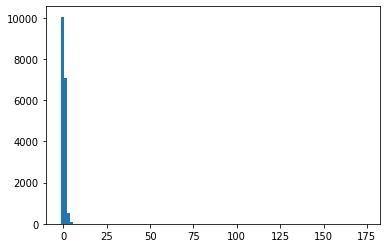

In [74]:
plt.hist(AmendedFilingPriceSpan, bins=100)
plt.show()

In [84]:
sdc_data.tail(10)

,DealNumber,CIK,CUSIP6,CUSIP9,Issuer,FilingDate,IssueDate,IPO,OrigIPO,Type,REIT,ADR,Unit,CEF,MainSICCode,Units,SpinOff,ForeignIssue,TrackingStockIssue,BestEftFirmCmtBghtDl,OfferPrice,SharesOutstandingAfterTheOffering,SharesOutstandingBeforeOffering,SharesOfferedSumOfAllMkts,SharesOfrdIncOverSoldSumOfAllMkts,PrimaryShsOfrdSumOfAllMkts,SecondaryShsOfrdSumOfAllMkts,OverallotAmtOptionSumOfAllMktsMil,OverallotAmtSoldSumOfAllMktsmil,TotGlobalOverallotmentSharesSold,SharesFiledSumOfAllMkts,PrimaryShsFiledSumOfAllMkts,SecondaryShsFiledSumOfAllMkts,AmendedShsFiledSumOfAllMkts,AmendedPrimaryShsFiledSumOfAllMkts,AmendedSecondaryShsFiledSumOfAllMkts,AmendMentDate,AmendHistShsFiledSumOfAllMkts,AmendHistSecShsFiledSumOfAllMkts,AmendHistOverallotShsOptionSumOfAllMkts,TickerAtIssue,TickerUltimateParents,TickerCurrent,TickerSpinOffParent,AllManagers_x,NonBookrunners,AllManagersParentsCode,AllMgrRoleCode,Managers_x,CoManagers,LeadManager,ManagerAgentsLawyersCode,DomesticSyndicateMemberCode,Bookrunners_x,BookrunnersParent,VentureBacked,FirmName,FundName,RoundNumberOfInvesTors,DisclosedRoundTotalmil,RoundDate,TotalKnownAmtInvestedInCompany000,AllManagers_y,Bookrunners_y,LeadManagersLongName,LeadManagers,Managers_y,CoManagersLongName,State,Nation,CurrentExchangeLongDescriptio,AllExchangesWhereIssueWillBeListed_1,AllExchangesWhereIssueWillBeListed_2,ExchangeWhereIssuWillBeLi,AllExchangesWhereIssuersStockTrades,FirstTwoExchangesWhereIssueWillBeListed,SpinParExch,PrimaryExchangeWhereIssuersStockTrades,AmendedHighFilingPrice,AmendedLowFilingPrice,AmendedMiddleOfFilingPrice,HighPriceOfFilingPriceRnge,LowPriceOfFilingPriceRnge,OriginalHighFilingPrice,OriginalLowFilingPrice,OriginalMiddleOfFilingPriceRange,AmendedFilingPriceSpan,OriginalFilingPriceSpan,Year
43699,3488215002,1712463.0,G6772P,NaN,Ranpak Holdings Corp,2019-12-10,2019-12-11,No,NaN,Class A Shares,NaN,No,No,No,2653,No,N,No,No,NaN,6.50,64284429.0,4.0,15384616.0,16923077.0,15384616.0,0.0,10.000,10.0,"1,538,461",NaN,NaN,NaN,"15,384,616","15,384,616",NaN,NaT,"15,384,616",NaN,NaN,PACK,PACK,PACK,NaN,CRAIG-HALLUM,NaN,CRAIG-HALLUM,BM,CRAIG-HALLUM,NaN,CRAIG-HALLUM,NaN,NaN,CRAIG-HALLUM,CRAIG-HALLUM,No,NaN,NaN,NaN,NaN,NaT,NaN,"Craig-Hallum, Inc.","Craig-Hallum, Inc.","Craig-Hallum, Inc.",CRAIG-HALLUM,"Craig-Hallum, Inc.",NaN,Ohio,United States,New York,N,N,NYSE,New York,NYSE,NaN,New York,NaN,NaN,NaN,NaN,NaN,5.96,5.96,5.96,NaN,0.0,2019
43700,3470419002,1517375.0,0H5582,NaN,Sprout Social Inc,2019-10-25,2019-12-12,Yes,NaN,Class A Shares,NaN,No,No,No,7372,No,N,No,No,NaN,17.00,47884399.0,3.0,8823530.0,8823530.0,8823530.0,0.0,22.500,NaN,NaN,NaN,NaN,NaN,"8,823,530","8,823,530",NaN,NaT,"8,823,530|8,823,530",-|-,"1,323,529|1,323,529",SPT,SPT,NaN,NaN,GS(JB)/MS(JB)/KEYBANC(JB)/WM-BLAIR(JB),CAN-GENUITY/STIFEL,GS,JB,GS,CAN-GENUITY/STIFEL,GS/MS/KEYBANC/WM-BLAIR,NaN,NaN,GS/MS(JB)/KEYBANC(JB),GS,Yes,Lightbank|Undisclosed Firm|New Enterprise Asso...,Lightbank - Unspecified Fund|Undisclosed Fund|...,2|3|3|3|3|3|3|3|3|3|1,"8,000.0|37,000.0|37,000.0|-|40,500.0|37,000.0|...",NaT,"95,500.0",Morgan Stanley & Co|KeyBanc Capital Markets In...,Morgan Stanley & Co|KeyBanc Capital Markets In...,Morgan Stanley & Co|KeyBanc Capital Markets In...,MS|KEYBANC|WM-BLAIR,Morgan Stanley & Co|KeyBanc Capital Markets In...,Stifel Nicolaus & Co Inc,Illinois,United States,NaN,NM,NM,NASDQ,Nasdaq,NASDQ,NaN,Nasdaq,18.00,16.00,17.00,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2019
43701,3489028002,1584754.0,1E0187,NaN,Akoustis Technologies Inc,2019-12-11,2019-12-12,No,NaN,Common Shares,NaN,No,No,No,3669,No,N,No,No,NaN,6.25,35443144.0,3.0,4800000.0,4800000.0,4800000.0,0.0,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,AKTS,AKTS,AKTS,NaN,CRAIG-HALLUM//LOOP,LOOP,CRAIG-HALLUM,BM,CRAIG-HALLUM,LOOP,CRAIG-HALLUM,NaN,NaN,CRAIG-HALLUM,CRAIG-HALLUM,No,NaN,NaN,NaN,NaN,NaT,NaN,Loop Capital Markets,"Craig-Hallum, Inc.","Craig-Hallum, Inc.",CRAIG-HALLUM,Loop Capital Markets,Loop Capital Markets,North Carolina,United States,Nasdaq,NM,NM,NASDQ,Nasdaq,NASDQ,NaN,OTC,NaN,NaN,

In [30]:
# create year variable
sdc_data['Year'] = sdc_data['IssueDate'].dt.year

# Questions: which values do i need?
# IPO Flag (Y/N)
#sum(sdc_data.loc[:, "IPOFlag(Y/N)"] == "Yes")
# Out: 18224
#sum(sdc_data.loc[:, "IPOFlag(Y/N)"] == "No")
# Out: 31503

sdc_data_usa = sdc_data.loc[sdc_data['Nation'] == "United States", :]
sdc_data_usa_ipo = sdc_data_usa.loc[sdc_data['IPOFlagYN'] == 'Yes', :]

df = sdc_data_usa_ipo.copy()
print(df.shape)
df = df.dropna(subset=['FilingDate'])
print(df.shape)
df = df.dropna(subset=['OfferPrice'])
print(df.shape)
df = df.dropna(subset=['OriginalHighFilingPrice'])
print(df.shape)
df = df.dropna(subset=['OriginalLowFilingPrice'])
print(df.shape)
#df = df.dropna(subset=['LowPriceofFilingPriceRnge'])
#print(df.shape)
#df = df.dropna(subset=['HighPriceofFilingPriceRnge'])
#print(df.shape)

df_without_range = df.dropna(subset=['HighPriceofFilingPriceRnge'])
df_without_range = df.dropna(subset=['LowPriceofFilingPriceRnge'])

# Data per Year?
data_per_year = sdc_data.groupby('Year')['IssueDate'].size()

# How many data for US per Year?
data_US_per_year = sdc_data_usa.groupby('Year')['IssueDate'].count()

# How many data for US IPOs per Year?
ipo_per_year = sdc_data_usa_ipo.groupby('Year')['IssueDate'].count()

# How many OfferPrices are per year given?
ipo_US_with_data_per_year = df.groupby('Year')['OfferPrice'].count()

# How many Ranges are per year given?
ipo_US_with_range_data_per_year = df_without_range.groupby('Year')['OfferPrice'].count()

ipos = pd.merge(data_per_year, data_US_per_year, how='outer', on="Year")
ipos = pd.merge(ipos, ipo_per_year, how='outer', on="Year")
ipos = pd.merge(ipos, ipo_US_with_data_per_year, how='outer', on="Year")
ipos = pd.merge(ipos, ipo_US_with_range_data_per_year, how='outer', on='Year')
# create barplot with numbers of IPOs
fig, ax = plt.subplots()
width = 0.35
p1 = ax.bar(ipos.index, ipos['IssueDate_x'])
p2 = ax.bar(ipos.index, ipos['IssueDate_y'])
p3 = ax.bar(ipos.index, ipos['IssueDate'])
p4 = ax.bar(ipos.index, ipos['OfferPrice_x'])
p5 = ax.bar(ipos.index, ipos['OfferPrice_y'])

ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
          ('data in SDC',
           'US data in SDC',
           'US IPOs in SDC',
           'US IPOs in SDC with needed price data',
           'US IPOs in SDC with needed range data')
          )
ax.autoscale_view()
plt.show()


# TODO: set date range
sdc_data_subset = sdc_data_subset.loc[sdc_data['Year'] > 2000]

# set Issue Date as index
sdc_data.index = sdc_data["IssueDate"]

sdc_data.groupby(["Year"]).count()

# TODO: Offer Price
# TODO: Original Low Filing Price
# TODO: Original High Filing Price

#sum(sdc_data.loc[["Filing Date"].notna() , ["Filing Date"]] == sdc_data.index)
#sum(sdc_data.loc[sdc_data["Filing Date"].notna() , ["Filing Date"]].values== sdc_data.loc[sdc_data["Filing Date"].notna() , :].index)

# TODO: how many values are since 1983 given?

# TODO: Get only numeric values
#def to_numeric(df, column):
#    df[df[[column]].apply(lambda x: x[0].isdigit(), axis=1)]
#to_numeric(sdc_data, "High Price of Filing Price Range")

type(sdc_data["HighPriceOfFilingPriceRange"][49724])
test = pd.to_numeric(sdc_data["HighPriceOfFilingPriceRange"], errors='coerce')
cleaned_data = sdc_data[pd.to_numeric(sdc_data["HighPriceOfFilingPriceRange"], errors='coerce').notnull()]
test.isna().sum()

# quick modeling

sdc_data_1987 = sdc_data.loc[(sdc_data["IssueDate"] > "1983-01-01") & (sdc_data["IssueDate"] < "1987-09-30"), :]
# 5009 examples from 1983 to Sept 1987

sum(sdc_data_1987.loc[:, "IPOFlag(Y/N)"] == "Yes")
# 2689 examples with IPO Flag

sdc_data_1987_IPO = sdc_data_1987.loc[sdc_data_1987["IPOFlag(Y/N)"] == "Yes", :]

sdc_data_1987_IPO.isna().sum()
# missing values
#Original Low Filing Price                        488
#Original High Filing Price                       489
#Low Price of Filing Price Range                2679
#High Price of Filing Price Range                2679

sdc_data_1987_IPO = sdc_data_1987_IPO.loc[sdc_data_1987_IPO["OriginalHighFilingPrice"].notna(), :]
sdc_data_1987_IPO = sdc_data_1987_IPO.drop(columns=["IssueDate"])
sdc_data_1987_IPO = sdc_data_1987_IPO.reset_index()


#sdc_data_1987_IPO = sdc_data[pd.to_numeric(sdc_data_1987_IPO["OfferPrice"])]
#sdc_data_1987_IPO = sdc_data[pd.to_numeric(sdc_data_1987_IPO["OriginalHighFilingPrice"])]

#features = np.array[("IssueDate", "IPOFlag(Y/N", "OfferPrice", "OriginalLowFilingPrice", "OriginalHighFilingPrice")]
#results = smf.ols('OfferPrice ~ OriginalLowFilingPrice + OriginalHighFilingPrice', data=sdc_data_1987_IPO).fit()
#print(results.summary())

#X = sdc_data_1987_IPO.loc[:, ["OriginalLowFilingPrice", "OriginalHighFilingPrice"]].values
#y = sdc_data_1987_IPO["OfferPrice"]
#X = sm.add_constant(X)

df = sdc_data
regex = r"\d+.\d+,\d+"

df[~df["OfferPrice"].str.contains(pat=regex, regex=True).fillna(value = True).values]
df[~df["OriginalHighFilingPrice"].str.contains(pat=regex, regex=True).fillna(value = True).values]
df[~df["OriginalLowFilingPrice"].str.contains(pat=regex, regex=True).fillna(value = True).values]

# Test two indizes
#2019-08-20 1.000,000
#2019-08-16 ,810
#2019-08-15 1,250
#2019-07-26 ,75
#2019-04-05 7.500,000

sample = df.loc[df.index.isin(["2019-08-20",
                               "2019-08-16",
                               "2019-08-15",
                               "2019-07-26",
                               "2019-04-05"]), :]

#test = df[pd.to_numeric(df["OriginalLowFilingPrice"], errors='coerce')]

verb = df.loc[df['Issuer'] == "Verb Technology Co Inc", :]


test = sample.loc[:, ['OfferPrice',
               'OriginalHighFilingPrice',
               'OriginalLowFilingPrice',
               'LowPriceOfFilingPriceRange',
               'HighPriceOfFilingPriceRange']]


